# Business Sales Dashboard Analysis

**Objective:** Analyze e-commerce data to identify best-selling products, sales trends, and high-revenue categories. Prepare insights and export data for Power BI dashboarding.

**Data Source:** `data/raw/Year 2009-2010.csv`

**Outline:**
1. Import Required Libraries and Custom Modules
2. Load E-commerce Data
3. Initial Data Exploration
4. Data Cleaning
5. Feature Engineering for Sales Analysis
6. Identify Best-Selling Products
7. Analyze Sales Trends Over Time
8. Identify High-Revenue Categories
9. Prepare Data for Power BI Dashboard Export


In [17]:
# 1. Import Required Libraries and Custom Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src directory to path for custom modules
data_src_path = os.path.abspath(os.path.join(os.pardir, 'src'))
if data_src_path not in sys.path:
    sys.path.append(data_src_path)

from data_loader import load_csv
from data_cleaner import clean_data
from visualizations import plot_sales_over_time, plot_top_products, plot_category_distribution

# Set plot style
sns.set_theme(style="whitegrid")

## 2. Load E-commerce Data
Load the raw e-commerce data using the custom `data_loader` module.

In [18]:
# Load the e-commerce dataset
data_path = '../data/raw/Year2009-2010.csv'
df = load_csv(data_path, encoding='ISO-8859-1')
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

✓ Successfully loaded data from ../data/raw/Year2009-2010.csv
  Shape: 525461 rows, 8 columns
Data loaded: 525461 rows, 8 columns


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


## 3. Initial Data Exploration
Explore the structure, data types, missing values, and unique values for key columns.

In [19]:
print(df.columns.tolist())

['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


In [20]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom  
2  12/1/2009 7:45   6.75      13085.0  United Kingdom  
3  12/1/2009 7:45   2.10      13085.0  United Kingdom  
4  12/1/2009 7:45   1.25      13085.0  United Kingdom  


In [21]:
# Data overview
df.info()

# Check for missing values
df.isnull().sum()

# Unique values in key columns
for col in ['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country']:
    print(f"{col}: {df[col].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB
Invoice: 28816 unique values
StockCode: 4632 unique values
Description: 4681 unique values
Customer ID: 4383 unique values
Country: 40 unique values
Country: 40 unique values


## 4. Data Cleaning
Clean the data using the custom `data_cleaner` module: handle missing values, remove duplicates, filter out cancelled transactions, and correct data types.

In [22]:
# Clean the data
df_clean = clean_data(df)
print(f"Cleaned data: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
df_clean.head()

Starting data cleaning pipeline...
✓ Removed 6865 duplicate rows
Data cleaning complete!
Cleaned data: 518596 rows, 8 columns
✓ Removed 6865 duplicate rows
Data cleaning complete!
Cleaned data: 518596 rows, 8 columns


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


## 5. Feature Engineering for Sales Analysis
Create new columns such as 'TotalPrice', extract date features, and categorize products if needed.

In [23]:
# Feature engineering
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['Price']
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['Week'] = df_clean['InvoiceDate'].dt.isocalendar().week

df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,Day,Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,49
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,49


## 6. Identify Best-Selling Products
Aggregate sales by product to find top-selling items by quantity and revenue.

Top 10 products by quantity sold:
StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    57327
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     54554
17003      BROCADE RING PURSE                    47647
21212      PACK OF 72 RETRO SPOT CAKE CASES      46079
84879      ASSORTED COLOUR BIRD ORNAMENT         44805
84991      60 TEATIME FAIRY CAKE CASES           36172
21977      PACK OF 60 PINK PAISLEY CAKE CASES    31687
85099B     JUMBO BAG RED RETROSPOT               30249
22197      SMALL POPCORN HOLDER                  29485
21232      STRAWBERRY CERAMIC TRINKET BOX        26496
Name: Quantity, dtype: int64

Top 10 products by revenue:
StockCode  Description                        
22423      REGENCY CAKESTAND 3 TIER               162885.71
85123A     WHITE HANGING HEART T-LIGHT HOLDER     155540.37
DOT        DOTCOM POSTAGE                         116401.99
84879      ASSORTED COLOUR BIRD ORNAMENT           72251.32
22086      PAPER CHAIN KI

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='TotalPrice'>)

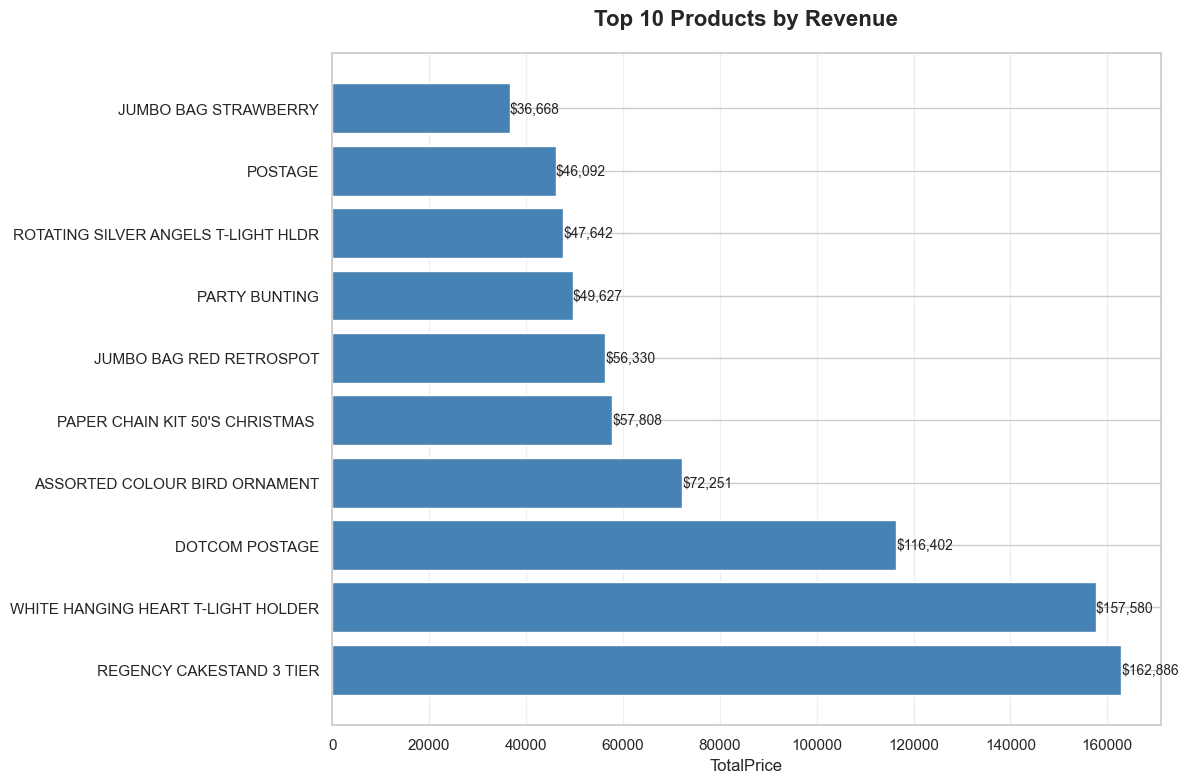

In [24]:
# Top products by quantity sold
top_products_qty = df_clean.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 products by quantity sold:")
print(top_products_qty)

# Top products by revenue
top_products_revenue = df_clean.groupby(['StockCode', 'Description'])['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 products by revenue:")
print(top_products_revenue)

# Visualize top products
plot_top_products(df_clean, product_column='Description', value_column='TotalPrice', top_n=10, title='Top 10 Products by Revenue')

✓ Saved figure to ../reports/visualizations\top_10_products_by_revenue.png


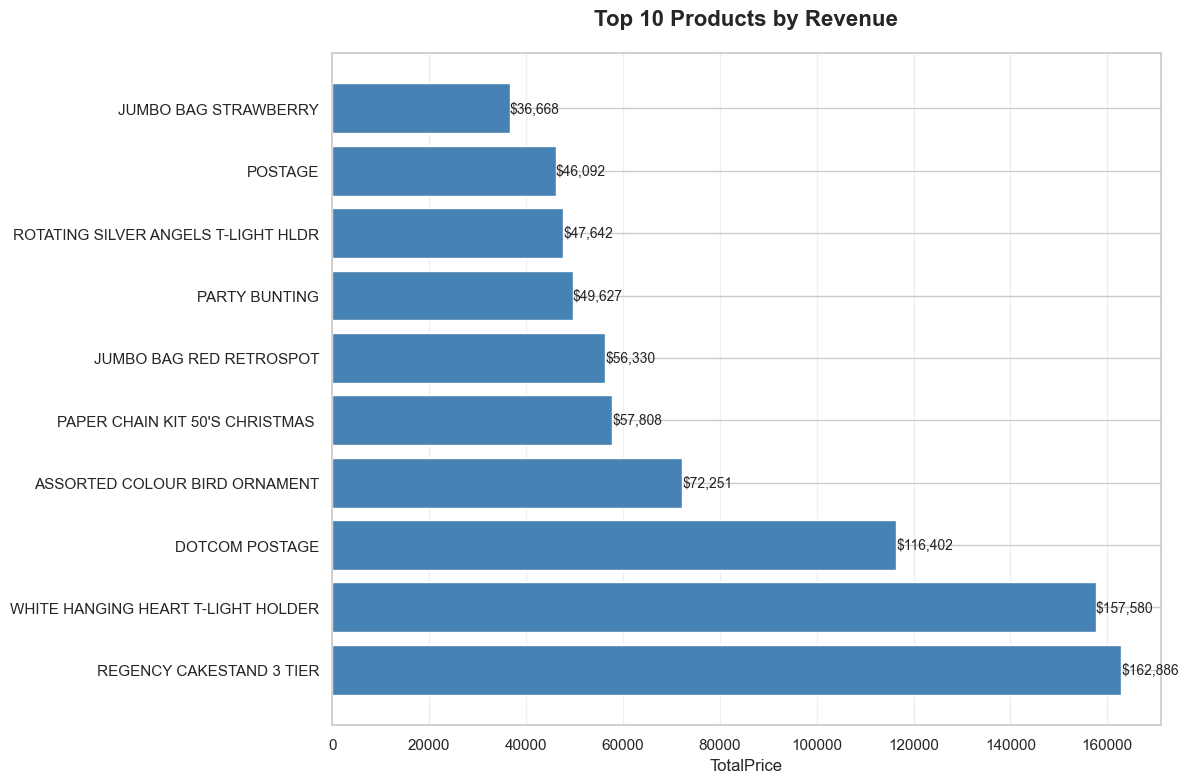

In [26]:
# Save top products by revenue bar chart
from visualizations import save_figure
fig, ax = plot_top_products(df_clean, product_column='Description', value_column='TotalPrice', top_n=10, title='Top 10 Products by Revenue')
save_figure(fig, filename='top_10_products_by_revenue.png', directory='../reports/visualizations')
plt.show()

**Insight:**

The bar chart of top 10 products by revenue shows which items are the biggest contributors to sales. Focusing on these products can maximize revenue and inform inventory and marketing priorities.

## 7. Analyze Sales Trends Over Time
Group sales data by time periods to visualize sales trends using the visualizations module.

,Year,Month,TotalPrice,YearMonth
0,2009,12,796648.500,2009-12-01
1,2010,1,622479.502,2010-01-01
2,2010,2,531265.366,2010-02-01
3,2010,3,763247.241,2010-03-01
4,2010,4,587926.692,2010-04-01


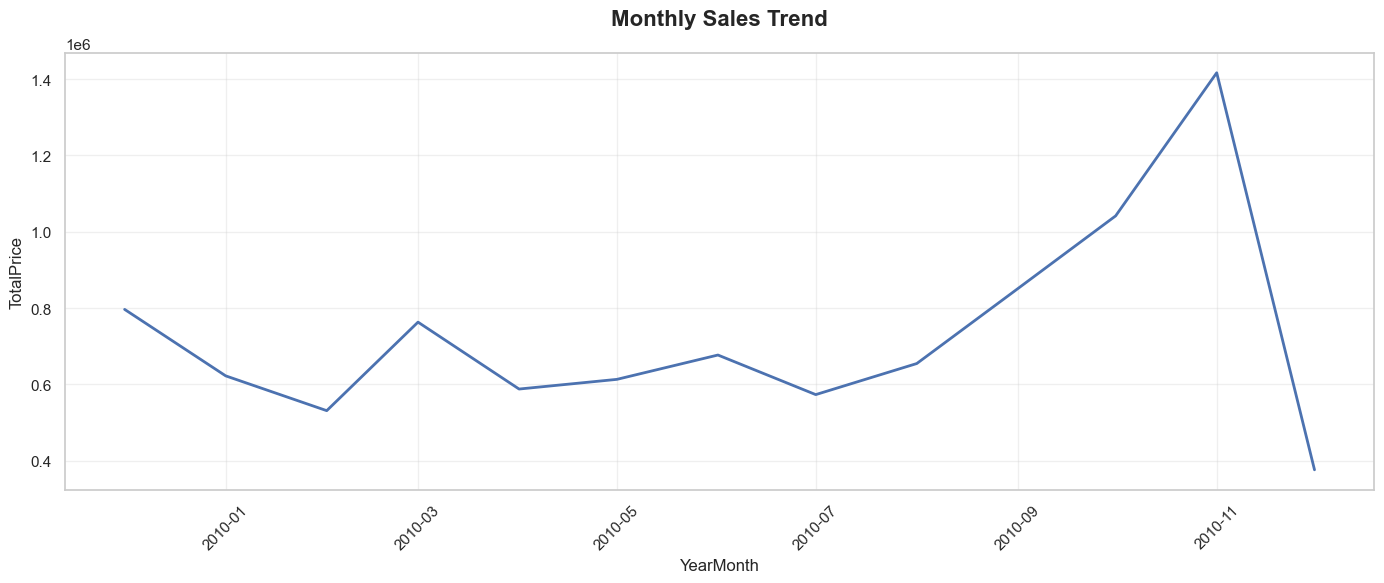

In [27]:
# Monthly sales trend
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plot_sales_over_time(monthly_sales, date_column='YearMonth', value_column='TotalPrice', title='Monthly Sales Trend')

monthly_sales.head()

✓ Saved figure to ../reports/visualizations\monthly_sales_trends.png


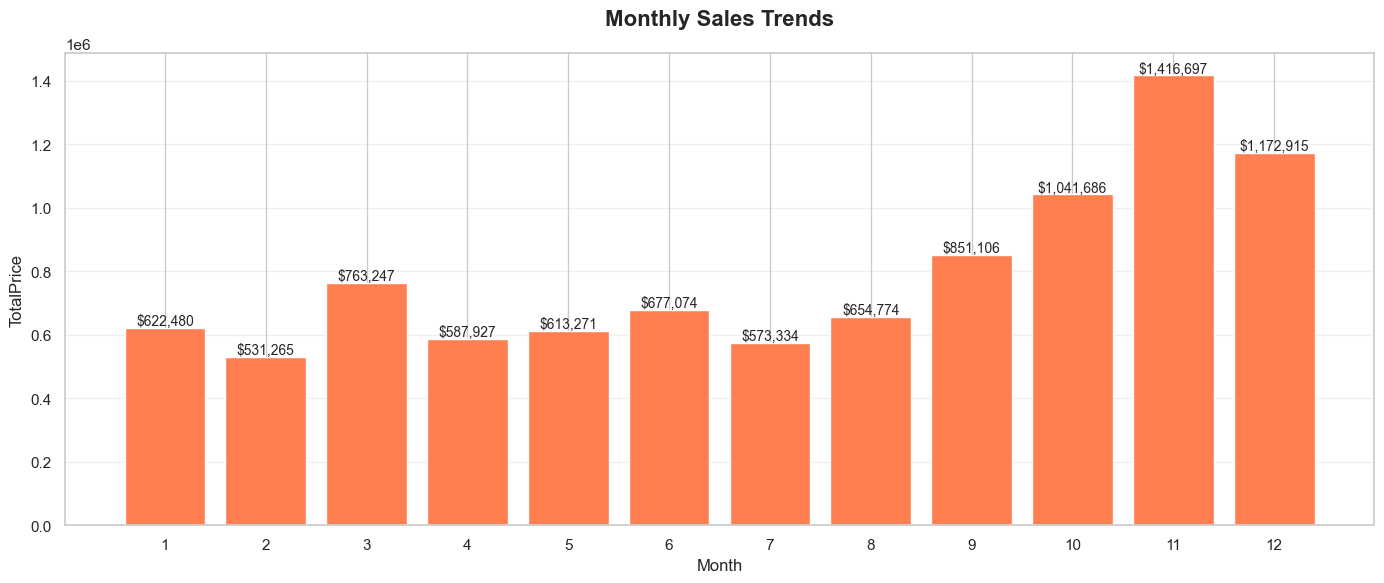

In [28]:
# Additional Visualization: Monthly Sales Trends (Bar Chart)
from visualizations import plot_monthly_trends, save_figure

fig, ax = plot_monthly_trends(df_clean, date_column='InvoiceDate', value_column='TotalPrice', title='Monthly Sales Trends')
save_figure(fig, filename='monthly_sales_trends.png', directory='../reports/visualizations')
plt.show()

✓ Saved figure to ../reports/visualizations\sales_heatmap.png


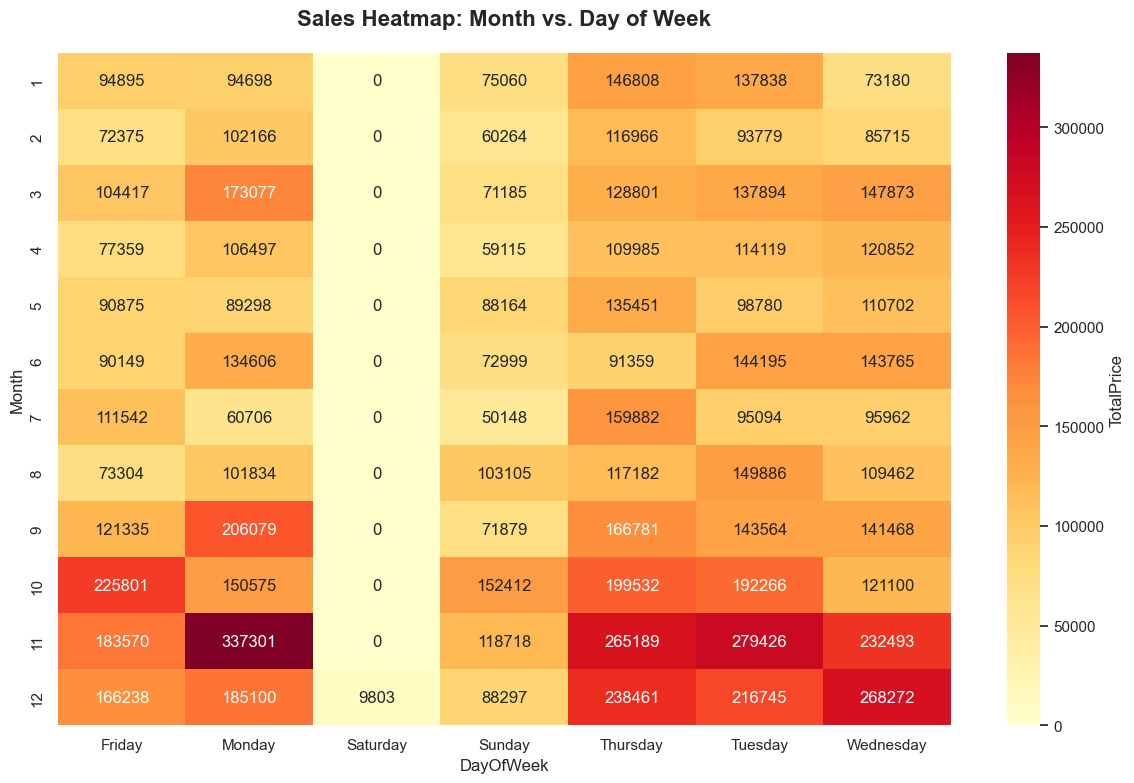

In [30]:
# Additional Visualization: Sales Heatmap (Day of Week vs. Month)
from visualizations import plot_heatmap

df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
fig, ax = plot_heatmap(
    df_clean,
    pivot_columns=['Month', 'DayOfWeek'],
    value_column='TotalPrice',
    title='Sales Heatmap: Month vs. Day of Week'
)
save_figure(fig, filename='sales_heatmap.png', directory='../reports/visualizations')
plt.show()

**Insight:**

The sales heatmap reveals which days of the week and months generate the most revenue. This can uncover patterns such as higher sales on weekends or during specific months, guiding staffing and promotional strategies.

**Insight:**

The monthly sales trends bar chart highlights periods of peak and low sales activity. Spikes may correspond to seasonal events or promotions, while dips could indicate off-peak months. This helps identify the best times for marketing campaigns and inventory planning.

## 8. Identify High-Revenue Categories
Aggregate sales by product categories or descriptions to identify categories contributing most to revenue.

Top 10 product descriptions by revenue:
Description
REGENCY CAKESTAND 3 TIER               162885.71
WHITE HANGING HEART T-LIGHT HOLDER     157580.28
DOTCOM POSTAGE                         116401.99
ASSORTED COLOUR BIRD ORNAMENT           72251.32
PAPER CHAIN KIT 50'S CHRISTMAS          57808.25
JUMBO BAG RED RETROSPOT                 56329.56
PARTY BUNTING                           49626.92
ROTATING SILVER ANGELS T-LIGHT HLDR     47641.89
POSTAGE                                 46092.36
JUMBO BAG STRAWBERRY                    36668.41
Name: TotalPrice, dtype: float64


(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Revenue Distribution by Product Description'}>)

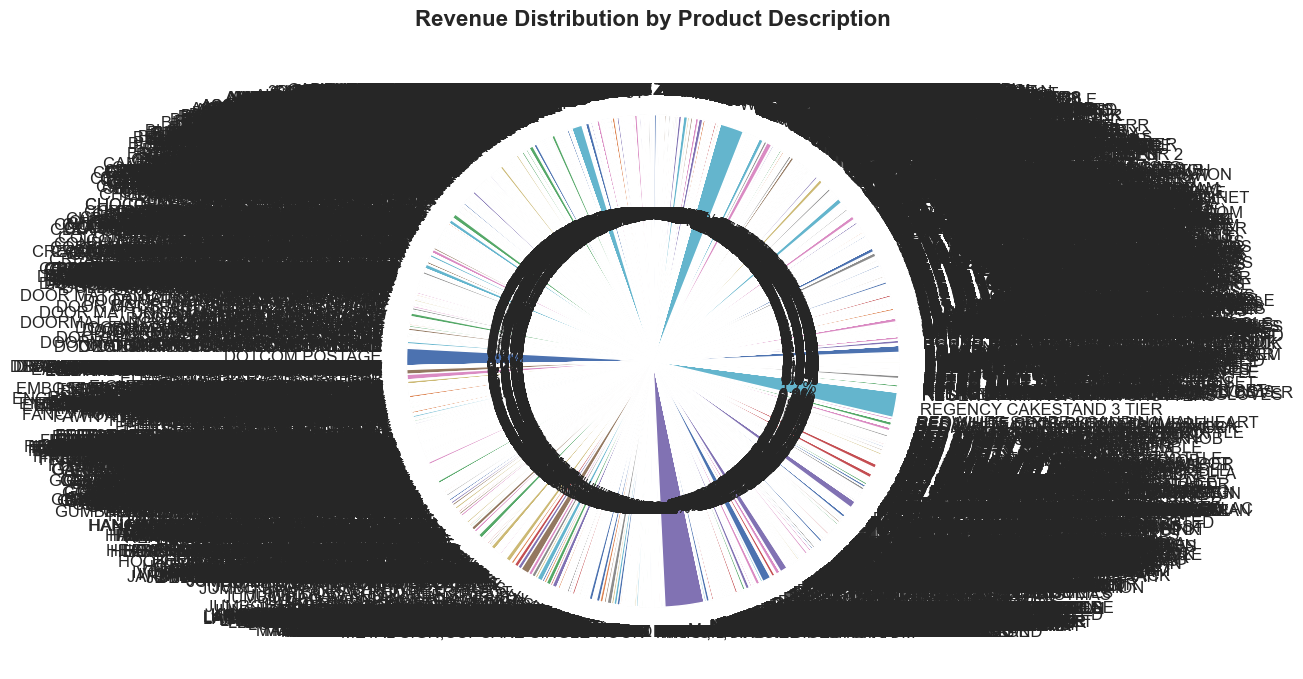

In [32]:
# Revenue by product description/category
revenue_by_desc = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("Top 10 product descriptions by revenue:")
print(revenue_by_desc)

# Visualize revenue by category/description (filter out negative and zero values)
plot_category_distribution(
    df_clean[df_clean['TotalPrice'] > 0],
    category_column='Description',
    value_column='TotalPrice',
    title='Revenue Distribution by Product Description'
)

✓ Saved figure to ../reports/visualizations\revenue_distribution_by_product.png


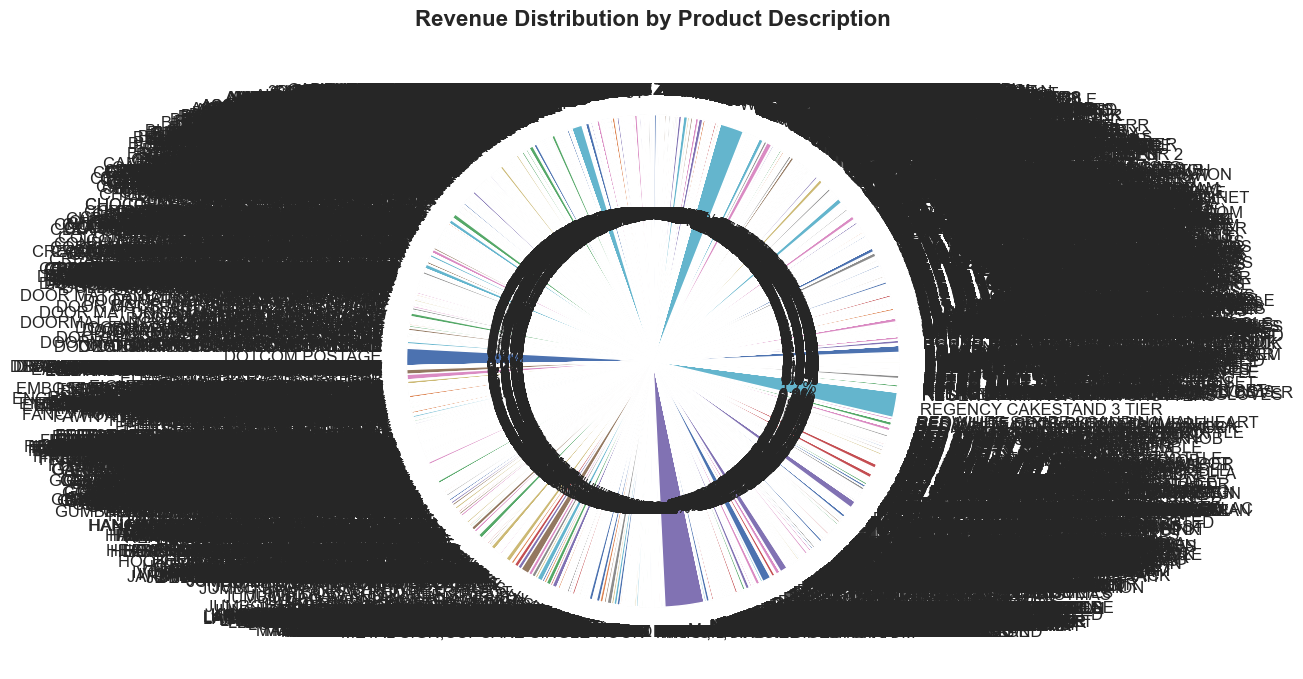

In [33]:
# Save revenue distribution pie chart (filtered for positive values)
fig, ax = plot_category_distribution(
    df_clean[df_clean['TotalPrice'] > 0],
    category_column='Description',
    value_column='TotalPrice',
    title='Revenue Distribution by Product Description'
)
save_figure(fig, filename='revenue_distribution_by_product.png', directory='../reports/visualizations')
plt.show()

**Insight:**

The revenue distribution pie chart highlights which products dominate total sales. A small number of products may account for a large share of revenue, suggesting opportunities for cross-selling or expanding similar product lines.

## 9. Export cleaned and feature-engineered data 
Export cleaned and feature-engineered data and summarize key insights for dashboard storytelling.

In [ ]:
# Export cleaned and feature-engineered data for Power BI
df_clean.to_csv('../data/processed/ecommerce_cleaned.csv', index=False)
print("Exported cleaned data to data/processed/ecommerce_cleaned.csv")

# Summarize key insights
print("\nKey Insights:")
print("- Top-selling products and categories identified.")
print("- Sales trends visualized by month and week.")
print("- Data ready for Power BI dashboarding.")

Exported cleaned data to data/processed/ecommerce_cleaned.csv

Key Insights:
- Top-selling products and categories identified.
- Sales trends visualized by month and week.
- Data ready for Power BI dashboarding.


## Customer Segmentation Visualizations

✓ Saved figure to ../reports/visualizations\revenue_by_country.png


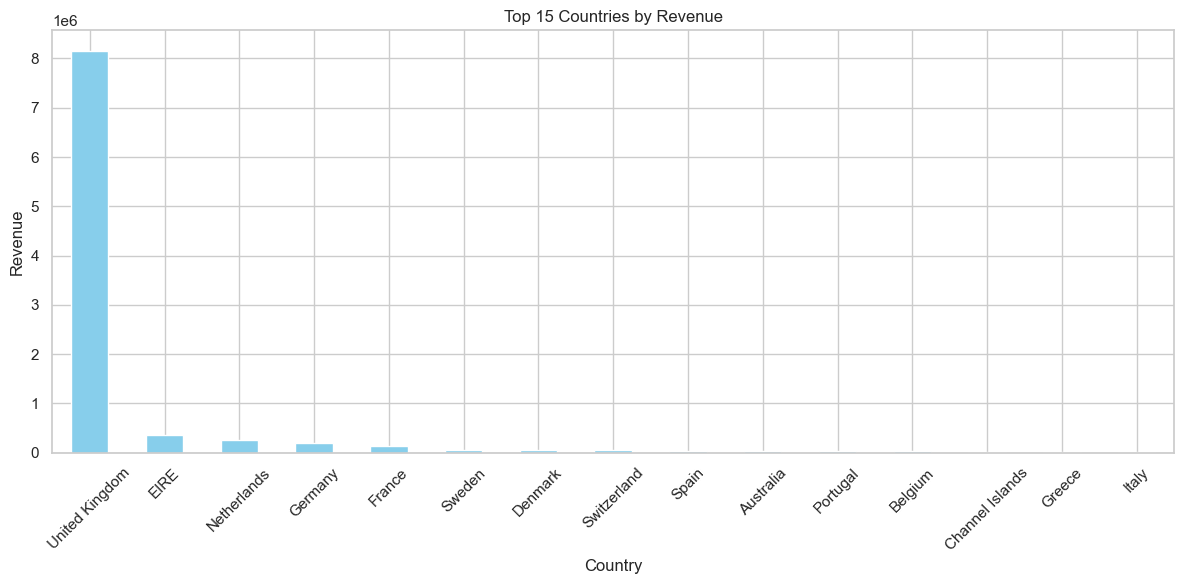

In [34]:
# Revenue by Country/Region
country_revenue = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12,6))
country_revenue.head(15).plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Top 15 Countries by Revenue')
ax.set_ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
from visualizations import save_figure
save_figure(fig, filename='revenue_by_country.png', directory='../reports/visualizations')
plt.show()

**Insight:**

The bar chart shows which countries generate the most revenue. This can help prioritize marketing and logistics efforts in high-value regions.

✓ Saved figure to ../reports/visualizations\top_customers_by_revenue.png


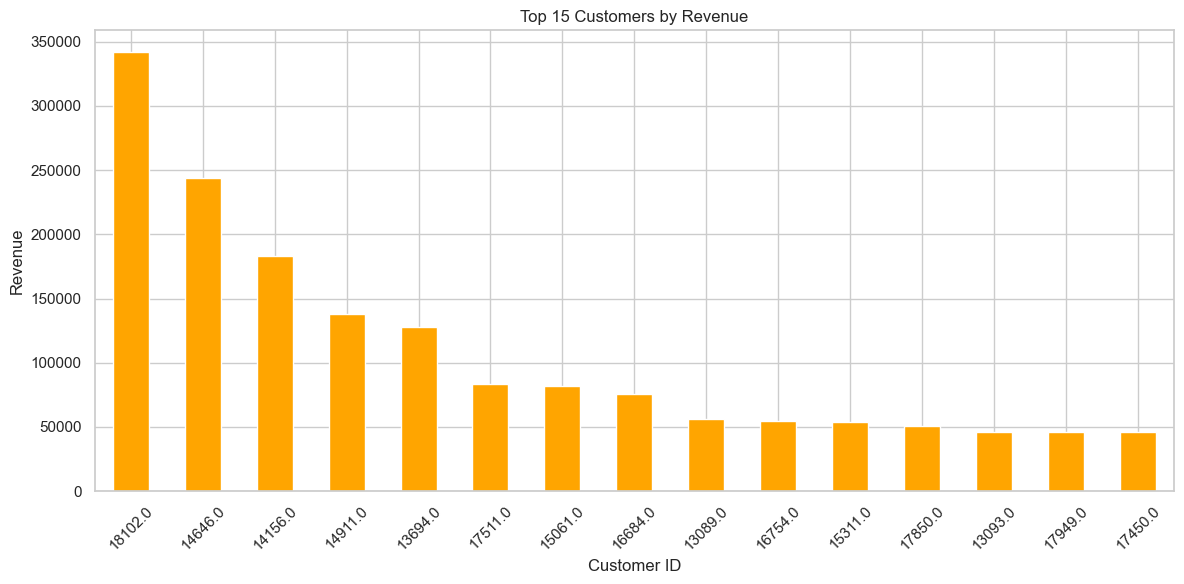

In [35]:
# Top Customers by Revenue (Pareto)
top_customers = df_clean.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(15)
fig, ax = plt.subplots(figsize=(12,6))
top_customers.plot(kind='bar', ax=ax, color='orange')
ax.set_title('Top 15 Customers by Revenue')
ax.set_ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
save_figure(fig, filename='top_customers_by_revenue.png', directory='../reports/visualizations')
plt.show()

**Insight:**

A small number of customers often contribute a large share of total revenue. Identifying and nurturing these top customers can drive business growth and loyalty.

## Product Analysis Visualizations

✓ Saved figure to ../reports/visualizations\top_products_by_return_rate.png


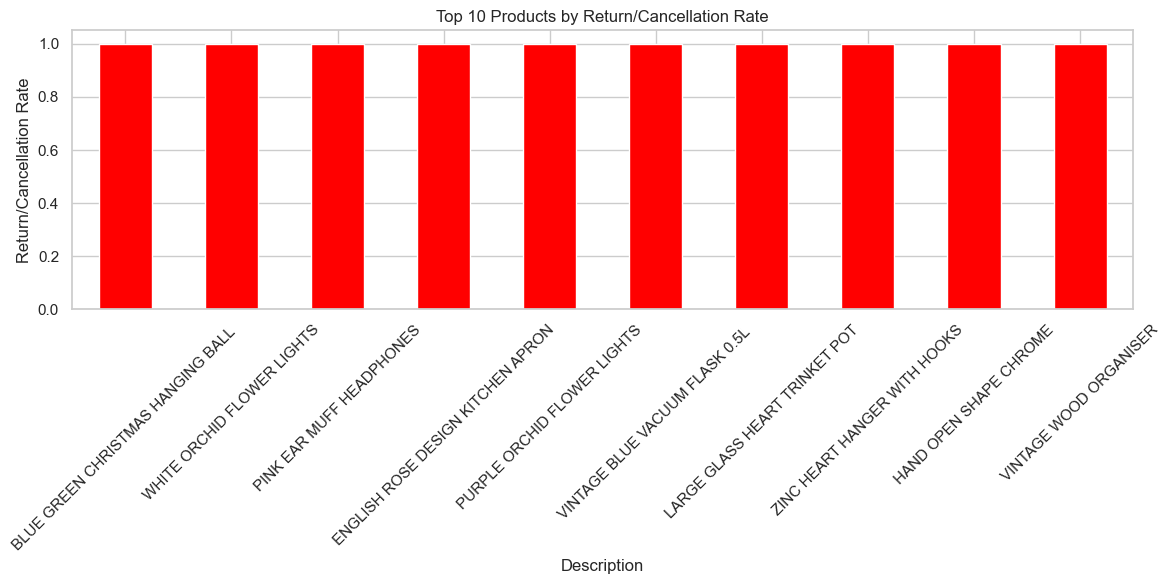

In [36]:
# Product Return/Cancellation Rates
# Assuming returns/cancellations are negative Quantity or Price, or Invoice starts with 'C'
df_clean['IsReturn'] = df_clean['Invoice'].astype(str).str.startswith('C')
return_rate = df_clean.groupby('Description')['IsReturn'].mean().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,6))
return_rate.plot(kind='bar', ax=ax, color='red')
ax.set_title('Top 10 Products by Return/Cancellation Rate')
ax.set_ylabel('Return/Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
save_figure(fig, filename='top_products_by_return_rate.png', directory='../reports/visualizations')
plt.show()

**Insight:**

Products with high return or cancellation rates may have quality issues, mismatched customer expectations, or other problems. Investigating these products can help reduce returns and improve customer satisfaction.

## Time Analysis Visualizations

✓ Saved figure to ../reports/visualizations\hourly_sales_trend.png


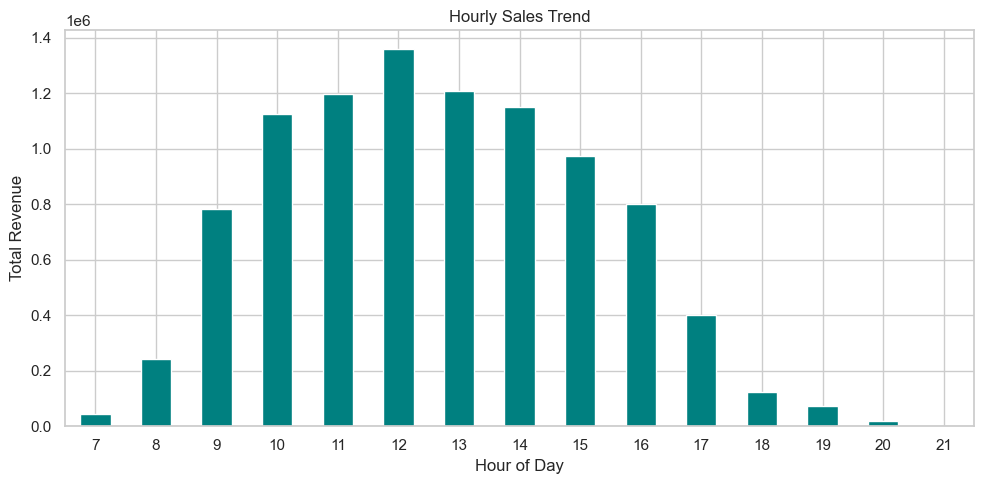

In [37]:
# Hourly Sales Trends
# Extract hour from InvoiceDate if not already present
if 'Hour' not in df_clean.columns:
    df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
hourly_sales = df_clean.groupby('Hour')['TotalPrice'].sum()
fig, ax = plt.subplots(figsize=(10,5))
hourly_sales.plot(kind='bar', ax=ax, color='teal')
ax.set_title('Hourly Sales Trend')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
save_figure(fig, filename='hourly_sales_trend.png', directory='../reports/visualizations')
plt.show()

**Insight:**

The hourly sales trend reveals peak shopping hours. This can inform staffing, marketing campaigns, and website maintenance schedules to maximize sales during high-traffic periods.

✓ Saved figure to ../reports/visualizations\yoy_revenue_growth.png


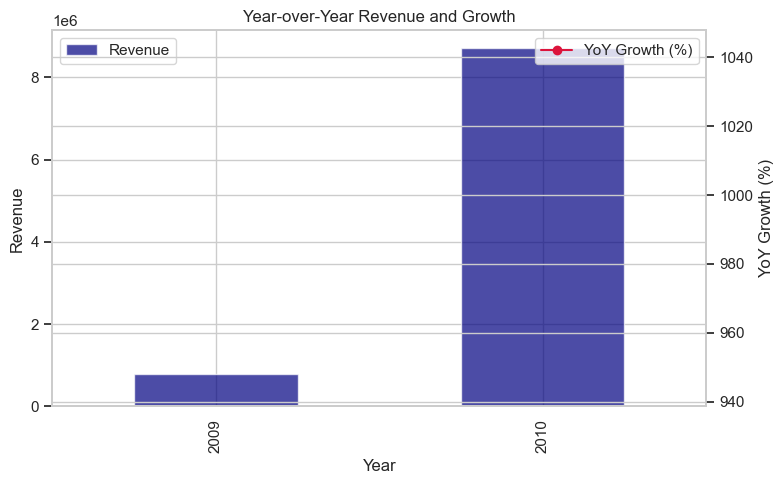

✓ Saved figure to ../reports/visualizations\wow_revenue_growth.png


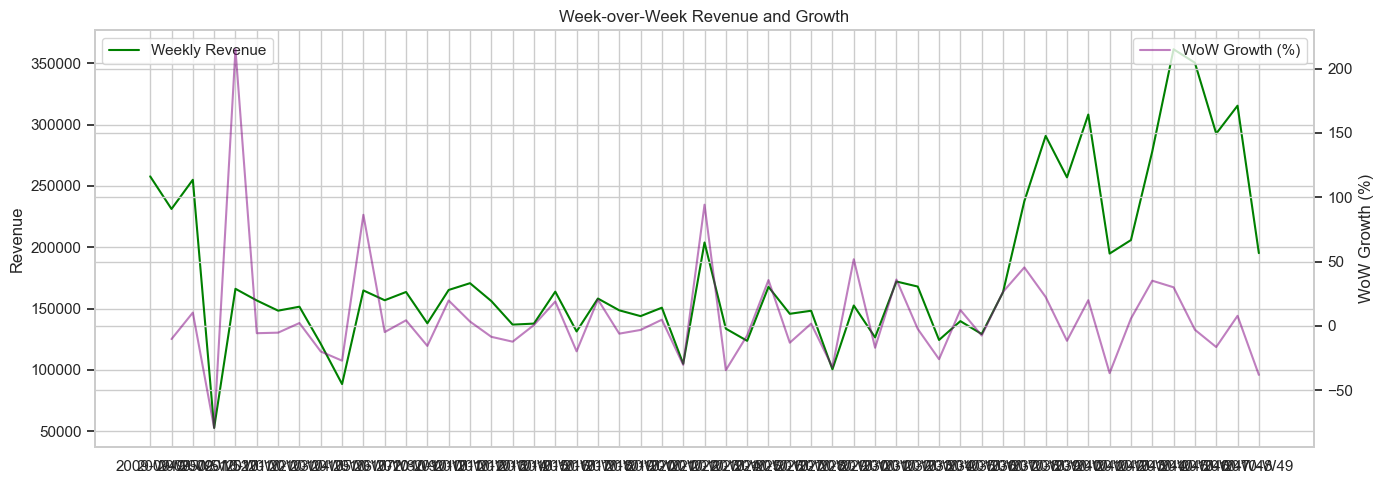

In [38]:
# Year-over-Year and Week-over-Week Growth
# Year-over-Year (YoY) Growth
sales_by_year = df_clean.groupby('Year')['TotalPrice'].sum()
years = sales_by_year.index.tolist()
yoy_growth = sales_by_year.pct_change() * 100
fig, ax = plt.subplots(figsize=(8,5))
sales_by_year.plot(kind='bar', ax=ax, color='navy', alpha=0.7, label='Revenue')
ax2 = ax.twinx()
yoy_growth.plot(ax=ax2, color='crimson', marker='o', label='YoY Growth (%)')
ax.set_ylabel('Revenue')
ax2.set_ylabel('YoY Growth (%)')
ax.set_title('Year-over-Year Revenue and Growth')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
save_figure(fig, filename='yoy_revenue_growth.png', directory='../reports/visualizations')
plt.show()

# Week-over-Week (WoW) Growth
weekly_sales = df_clean.groupby(['Year', 'Week'])['TotalPrice'].sum().reset_index()
weekly_sales['YearWeek'] = weekly_sales['Year'].astype(str) + '-W' + weekly_sales['Week'].astype(str)
weekly_sales['WoW_Growth'] = weekly_sales['TotalPrice'].pct_change() * 100
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(weekly_sales['YearWeek'], weekly_sales['TotalPrice'], label='Weekly Revenue', color='green')
ax2 = ax.twinx()
ax2.plot(weekly_sales['YearWeek'], weekly_sales['WoW_Growth'], label='WoW Growth (%)', color='purple', alpha=0.5)
ax.set_ylabel('Revenue')
ax2.set_ylabel('WoW Growth (%)')
ax.set_title('Week-over-Week Revenue and Growth')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
save_figure(fig, filename='wow_revenue_growth.png', directory='../reports/visualizations')
plt.show()

**Insight:**

Year-over-year and week-over-week growth visualizations help track business momentum, spot seasonal patterns, and quickly identify periods of acceleration or slowdown. This is crucial for forecasting and strategic planning.

## Order Analysis Visualizations

C:\Users\SNFD\AppData\Local\Temp\ipykernel_14920\2078387199.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_by_month = df_clean.groupby('YearMonth').apply(lambda x: x['TotalPrice'].sum() / x['Invoice'].nunique())


✓ Saved figure to ../reports/visualizations\aov_by_month.png


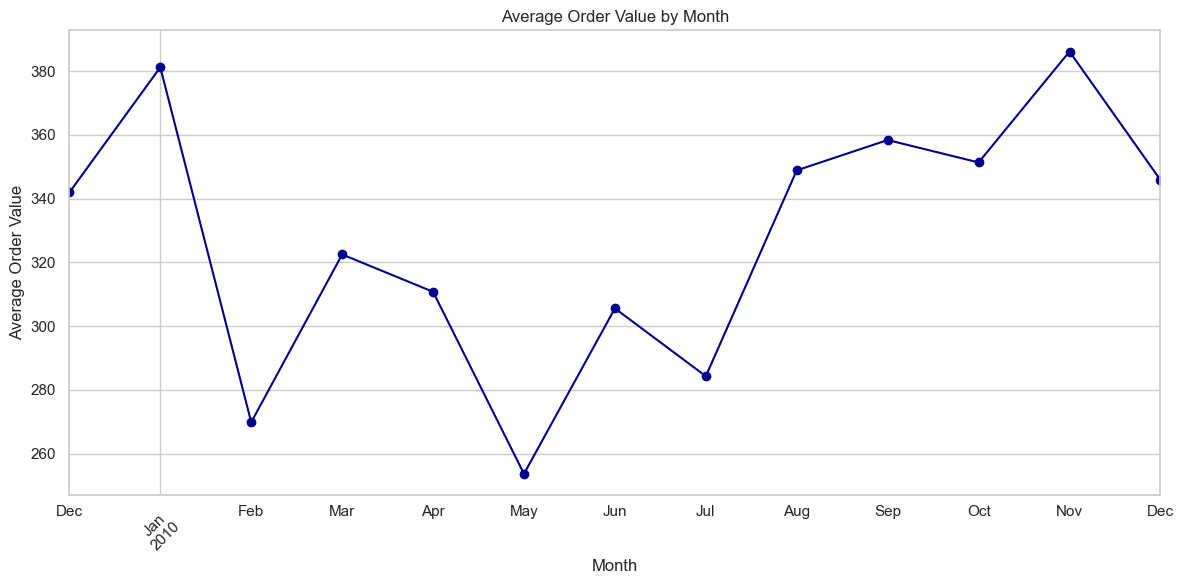

In [39]:
# Average Order Value (AOV) by Month
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
aov_by_month = df_clean.groupby('YearMonth').apply(lambda x: x['TotalPrice'].sum() / x['Invoice'].nunique())
fig, ax = plt.subplots(figsize=(12,6))
aov_by_month.plot(ax=ax, marker='o', color='darkblue')
ax.set_title('Average Order Value by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
save_figure(fig, filename='aov_by_month.png', directory='../reports/visualizations')
plt.show()

**Insight:**

Tracking average order value by month helps identify trends in customer spending and the impact of promotions or seasonality. Increasing AOV is a key lever for revenue growth.

✓ Saved figure to ../reports/visualizations\order_size_distribution.png


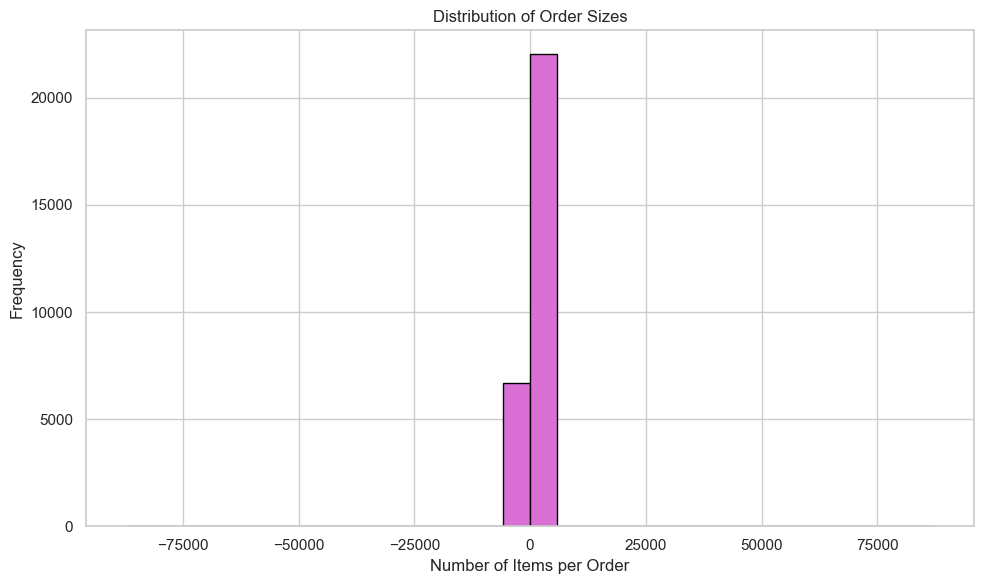

In [40]:
# Distribution of Order Sizes (Histogram)
order_sizes = df_clean.groupby('Invoice')['Quantity'].sum()
fig, ax = plt.subplots(figsize=(10,6))
order_sizes.plot(kind='hist', bins=30, ax=ax, color='orchid', edgecolor='black')
ax.set_title('Distribution of Order Sizes')
ax.set_xlabel('Number of Items per Order')
ax.set_ylabel('Frequency')
plt.tight_layout()
save_figure(fig, filename='order_size_distribution.png', directory='../reports/visualizations')
plt.show()

**Insight:**

The order size distribution shows how many items customers typically buy per order. This can inform bundling strategies, minimum order incentives, and inventory planning.

**Insight:**

Understanding the share of revenue from repeat versus new customers helps guide retention and acquisition strategies. A high proportion of repeat sales indicates strong customer loyalty, while a low proportion may signal a need for improved retention efforts.